In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

data = pd.read_csv('../input/world-bank-youth-unemployment/API_ILO_country_YU.csv')

<h1 style="font-size:40px">Description of Data</h1>

<img src="https://www.investopedia.com/thmb/G-f1etpNlgfR4UkDjN3E8pmgcrA=/735x0/unemployment-5bfc344bc9e77c00519c4b43.jpg">

Unemployment, according to the Organisation for Economic Co-operation and Development (OECD), is persons above a specified age (usually above 15) not being in paid employment or self-employment but currently available for work during the reference period.

Unemployment is measured by the unemployment rate as the number of people who are unemployed as a percentage of the labour force (the total number of people employed added to those unemployed).

In [2]:
# describing the data

data.describe(include='all')

,Country Name,Country Code,2010,2011,2012,2013,2014
count,219,219,219.000000,219.000000,219.000000,219.000000,219.000000
unique,219,219,NaN,NaN,NaN,NaN,NaN
top,Rwanda,BTN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,17.892957,17.902713,18.148142,18.100429,17.943539
std,NaN,NaN,10.540099,10.887558,11.430862,11.674366,11.554674
min,NaN,NaN,0.700000,0.700000,0.500000,0.700000,0.700000
25%,NaN,NaN,10.600000,10.410530,10.500000,10.490677,10.500000
50%,NaN,NaN,14.900000,14.523908,14.400000,14.100000,14.124300
75%,NaN,NaN,23.000000,23.200001,24.616293,23.435561,23.310668


In [3]:
# Covariance

data.cov()

,2010,2011,2012,2013,2014
2010,111.093688,111.456673,114.713348,114.387581,113.248175
2011,111.456673,118.538909,122.713660,123.061025,121.558991
2012,114.713348,122.713660,130.664609,132.082329,130.131639
2013,114.387581,123.061025,132.082329,136.290812,133.999850
2014,113.248175,121.558991,130.131639,133.999850,133.510501


In [4]:
# correlation

data.corr()

,2010,2011,2012,2013,2014
2010,1.000000,0.971250,0.952117,0.929610,0.929884
2011,0.971250,1.000000,0.986015,0.968181,0.966271
2012,0.952117,0.986015,1.000000,0.989766,0.985249
2013,0.929610,0.968181,0.989766,1.000000,0.993375
2014,0.929884,0.966271,0.985249,0.993375,1.000000


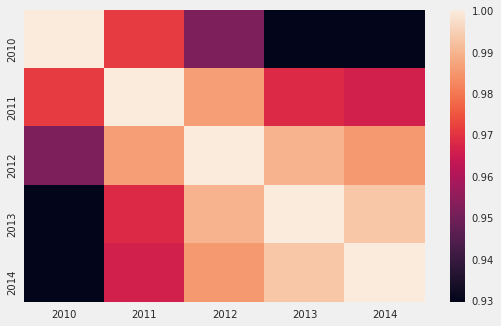

In [5]:
sns.heatmap(data.corr())
plt.show()

<h1 style="font-size:40px">Checking null and duplicate values</h1>

In [6]:
#checking for null values

data.isnull().sum()

Country Name    0
Country Code    0
2010            0
2011            0
2012            0
2013            0
2014            0
dtype: int64

In [7]:
#dropping duplicates

data = data.drop_duplicates()

<h1 style="font-size:40px">Distribution of the Variables</h1>

In [8]:
px.box(data.drop(['Country Name','Country Code'], axis=1))